Цель работы:

Основной целью работы является освоение специализированных пакетов для решения 
задач в непрерывном и дискретном времени

In [1]:
;date

Thu Dec  7 23:45:17 RTZ 2023


In [2]:
;whoami

win-orl1fa978ms\admin


1. Реализовать и проанализировать модель роста численности изолированной популяции (модель Мальтуса):
$x = a x$, $a = b - c$.
где $x\left( t \right)$ — численность изолированной популяции в момент времени $t$, $a$ — коэффициент роста популяции, $b$ — коэффициент рождаемости, $c$ — коэффициент смертности.
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

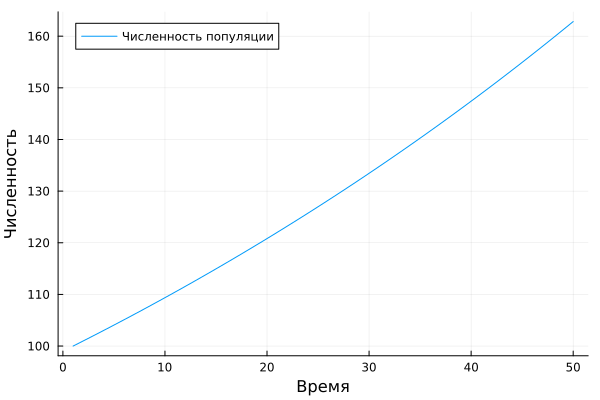

In [3]:
using Plots

function malthus_model(x0, b, c, T)
    # Функция, представляющая модель Мальтуса
    a = b - c
    x = [x0]
    for t in 2:T
        push!(x, a * x[end])
    end
    return x
end

# Начальные данные и параметры
x0 = 100.0  # начальная численность популяции
b = 1.02  # коэффициент рождаемости
c = 0.01  # коэффициент смертности
T = 50.0    # количество шагов моделирования

# Моделирование
population = malthus_model(x0, b, c, T)

# Построение графика
plot(1:T, population, label="Численность популяции", xlabel="Время", ylabel="Численность")

2. Реализовать и проанализировать логистическую модель роста популяции, заданную уравнением:\
$\dot{x} = rx\left( 1 - \frac{x}{k} \right), r>0, k>0$ \
$𝑟$ — коэффициент роста популяции, $𝑘$ — потенциальная ёмкость экологической системы (предельное значение численности популяции). Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\logistic_animation.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\logistic_animation.gif")
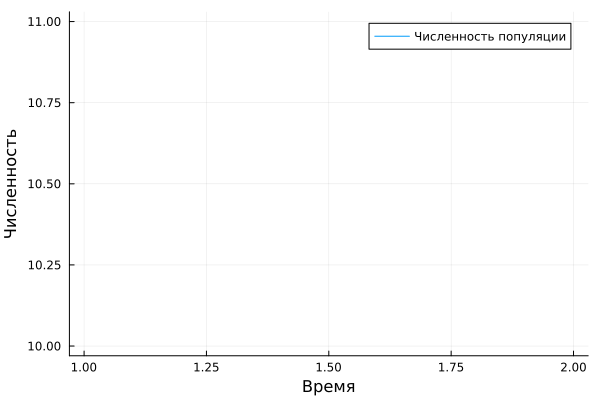

In [4]:
using Plots

function logistic_model(x0, r, k, T, dt)
    # Функция, представляющая логистическую модель роста популяции
    x = [x0]
    for t in 2:T
        deltax = r * x[end] * (1 - x[end] / k) * dt
        push!(x, x[end] + deltax)
    end
    return x
end

# Начальные данные и параметры
x0 = 10.0  # начальная численность популяции
r = 0.1    # коэффициент роста популяции
k = 100.0  # потенциальная ёмкость экологической системы
T = 200    # количество шагов моделирования
dt = 0.1   # временной шаг

# Моделирование
population = logistic_model(x0, r, k, T, dt)

# Построение графика
plot(1:T, population, label="Численность популяции", xlabel="Время", ylabel="Численность")

# Анимация
anim = @animate for t in 1:T
    plot(1:t, population[1:t], label="Численность популяции", xlabel="Время", ylabel="Численность")
end
gif(anim, "logistic_animation.gif", fps = 10)

3. Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIRмодель):\
$$
\begin{cases}
   \dot{s} = -\beta i s & \\
   \dot{i} = \beta i s - v i \\
   \dot{r} = v i
\end{cases}
$$
где $s\left( t \right)$ — численность восприимчивых к болезни индивидов в момент времени
$𝑡$, $i\left( t \right)$ — численность инфицированных индивидов в момент времени $t$, $r\left( t \right)$ —
численность переболевших индивидов в момент времени $𝑡$, $\beta$ — коэффициент интенсивности контактов индивидов с последующим инфицированием, $v$ — коэффициент
интенсивности выздоровления инфицированных индивидов. Численность популяции
считается постоянной, т.е. $\dot{s}$ + $\dot{i}$+ $\dot{r}$= 0. Начальные данные и параметры задать
самостоятельно и пояснить их выбор. Построить соответствующие графики (в том
числе с анимацией).

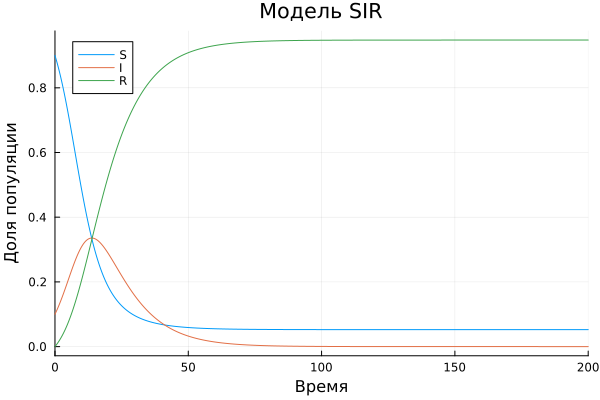

In [5]:
using DifferentialEquations 
using Plots

function sir_model(du, u, p, t)
    betta, v = p
    du[1] = -betta * u[1] * u[2]
    du[2] = betta * u[1] * u[2] - v * u[2]
    du[3] = v * u[2]
end

# Начальные данные и параметры
betta = 0.3   # коэффициент интенсивности контактов с последующим инфицированием
v = 0.1   # коэффициент интенсивности выздоровления
s0 = 0.9  # начальная доля восприимчивых к болезни
i0 = 0.1  # начальная доля инфицированных
r0 = 0.0  # начальная доля выздоровевших
u0 = [s0, i0, r0]

T = 200   # общее время моделирования
tspan = (0.0, T)
prob = ODEProblem(sir_model, u0, tspan, [betta, v])

# Решение уравнений модели SIR
sol = solve(prob)

# Построение графиков
plot(sol, label=["S" "I" "R"], xlabel="Время", ylabel="Доля популяции", title="Модель SIR")

4. Как расширение модели $SIR$ ($Susceptible-Infected-Removed$) по результатом эпидемии
испанки была предложена модель $SEIR$ ($Susceptible-Exposed-Infected-Removed$):\
$$
\begin{cases}
   \dot{s}(t) = -\frac{\beta}{N} s(t) i(t),\\
   \dot{e}(t) =  \frac{\beta}{N} s(t) i(t) - \delta e(t),\\
   \dot{i}(t) = \delta e(t) - \gamma i(t),\\
   \dot{r}(t) = \gamma i(t).
\end{cases}
$$
Размер популяции сохраняется:
$s\left( t \right)$ + $e\left( t \right)$ + $i\left( t \right)$ + $r\left( t \right)$ = $N$.
Исследуйте, сравните с $SIR$.

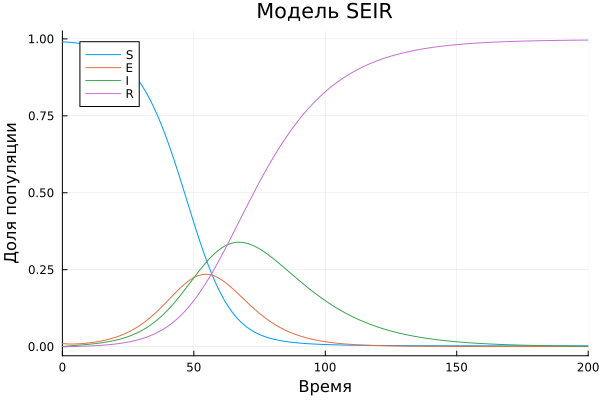

In [6]:
using DifferentialEquations
using Plots

function seir!(du, u, p, t)
    betta, delta, gamma, N = p
    s, e, i, r = u
    du[1] = -betta / N * s * i
    du[2] = betta / N * s * i - delta * e
    du[3] = delta * e - gamma * i
    du[4] = gamma * i
end

# Начальные условия
u0 = [0.99, 0.01, 0.0, 0.0]  # Начальные доли S, E, I, R
betta = 0.3
delta = 0.1
gamma = 0.05
N = sum(u0)
p = [betta, delta, gamma, N]

# Временной интервал и параметры интегрирования
tspan = (0.0, 200.0)
prob = ODEProblem(seir!, u0, tspan, p)

# Решение системы уравнений с использованием метода Эйлера
sol = solve(prob, Euler(), dt=0.1)

# Визуализация результатов
plot(sol, labels=["S" "E" "I" "R"], xlabel="Время", ylabel="Доля популяции", title="Модель SEIR")

5. Для дискретной модели Лотки–Вольтерры:\
$$
\begin{cases}
    X_{1}(t+1) = aX_{1}(t)(1-X_{1}(t)) - X_{1}(t)X_{2}(t)\\
    X_{2}(t+1) = -cX_{2} + dX_{1}X_{1}(t)
\end{cases}   
$$
с начальными данными $𝑎 = 2, 𝑐 = 1, 𝑑 = 5$ найдите точку равновесия. Получите
и сравните аналитическое и численное решения. Численное решение изобразите на
фазовом портрете.

Точка равновесия: [0.20000000004225885, 1.6000000003397907]


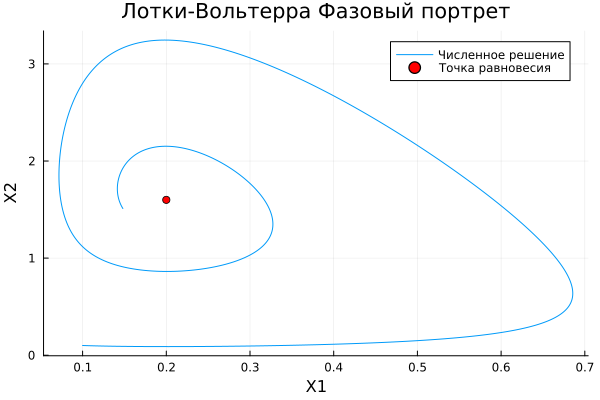

In [7]:
using Plots
using NLsolve

function lotka_volterra(a, c, d, x1_0, x2_0, dt, num_steps)
    x1 = x1_0
    x2 = x2_0
    results = [(x1, x2)]

    for _ in 1:num_steps
        x1_new = x1 + dt * (a * x1 * (1 - x1) - x1 * x2)
        x2_new = x2 + dt * (-c * x2 + d * x1 * x2)
        x1, x2 = x1_new, x2_new
        push!(results, (x1, x2))
    end  
    
    return results
end

# Параметры модели
a = 2.0
c = 1.0
d = 5.0
x1_0 = 0.1
x2_0 = 0.1
dt = 0.01
num_steps = 1000

# Получение численного решения
numerical_solution = lotka_volterra(a, c, d, x1_0, x2_0, dt, num_steps)

function find_equilibrium(a, c, d)
    function system!(F, x)
        F[1] = a * x[1] * (1 - x[1]) - x[1] * x[2]
        F[2] = -c * x[2] + d * x[1] * x[2]
    end

    initial_guess = [0.5, 0.5]  # Начальное предположение для точки равновесия
    result = nlsolve(system!, initial_guess)

    equilibrium_point = result.zero
    return equilibrium_point
end

equilibrium = find_equilibrium(a, c, d)
println("Точка равновесия: ", equilibrium)
x1_values = [x[1] for x in numerical_solution]
x2_values = [x[2] for x in numerical_solution]

plot(x1_values, x2_values, xlabel="X1", ylabel="X2", label="Численное решение", title="Лотки-Вольтерра Фазовый портрет")
scatter!([equilibrium[1]], [equilibrium[2]], color="red", label="Точка равновесия")

6. Реализовать на языке Julia модель отбора на основе конкурентных отношений:\
$$
\begin{cases}
\dot{x} = \alpha x-\beta xy \\
\dot{y} = -\alpha y+\beta xy
\end{cases}
$$
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


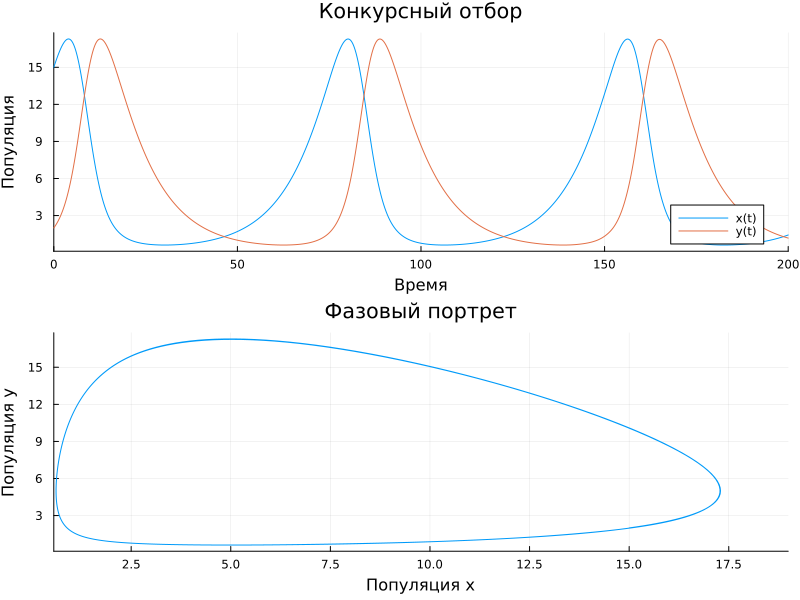

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Сompetitive_relations1.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Сompetitive_relations1.gif")
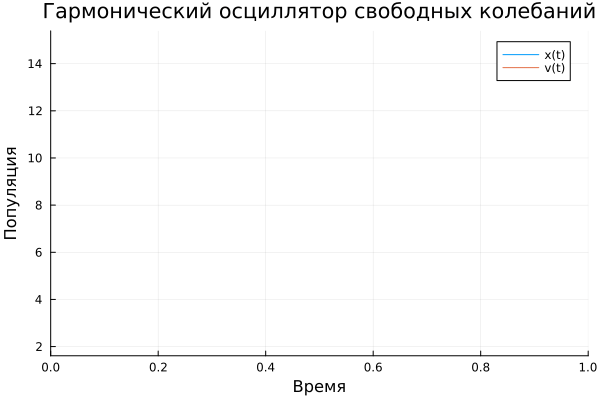

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Сompetitive_relations2.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Сompetitive_relations2.gif")
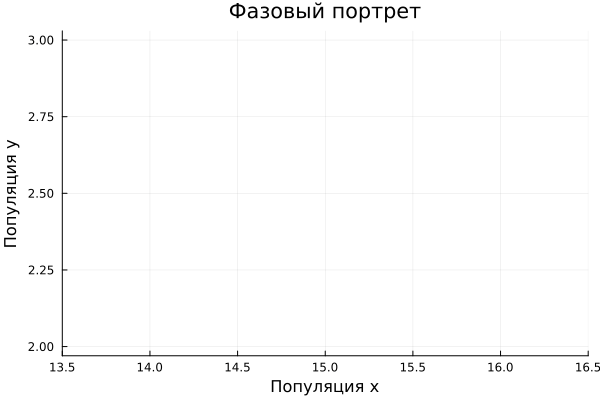

In [8]:
using DifferentialEquations
using Plots

# Определение функции для системы дифференциальных уравнений
function competitive_selection!(du, u, p, t)
    alfa, betta = p
    du[1] = alfa * u[1] - betta * u[1] * u[2]
    du[2] = -alfa * u[2] + betta * u[1] * u[2]
end

# Начальные параметры
alfa = 0.1  # Параметр роста
betta = 0.02  # Параметр взаимодействия

# Начальные условия
x0 = 15.0  # Начальное количество популяции вида x
y0 = 2.0  # Начальное количество популяции вида y

# Параметры системы
u0 = [x0, y0]
tspan = (0.0, 200.0)
p = [alfa, betta]

# Решаем дифференциальное уравнение
prob = ODEProblem(competitive_selection!, u0, tspan, p)
sol = solve(prob)

# Строим графики
plot1 = plot(sol, label=["x(t)" "y(t)"], xlabel="Время", ylabel="Популяция", title="Конкурсный отбор")

# Строим фазовый портрет
plot2 = plot(sol, vars=(1,2), xlabel="Популяция x", ylabel="Популяция y", title="Фазовый портрет", label="")

# Анимация
anim1 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"], xlabel="Время", ylabel="Популяция", title="Гармонический осциллятор свободных колебаний")
end

anim2 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2), xlabel="Популяция x", ylabel="Популяция y", title="Фазовый портрет", label="")
end

plot(plot1, plot2, layout=(2,1), legend=:bottomright, size=(800, 600))
display(plot!())

display(gif(anim1, "Сompetitive_relations1.gif", fps = 10))
display(gif(anim2, "Сompetitive_relations2.gif", fps = 100))

7. Реализовать на языке Julia модель консервативного гармонического осциллятора\
$\ddot{x} + \omega_{0}^{2}x = 0$, $x(t_{0}) = x_{0}$, $\dot{x}(t_{0}) = y_{0}$\
где $\omega_{0}$ — циклическая частота. Начальные параметры подобрать самостоятельно,
выбор пояснить. Построить соответствующие графики (в том числе с анимацией)
и фазовый портрет.

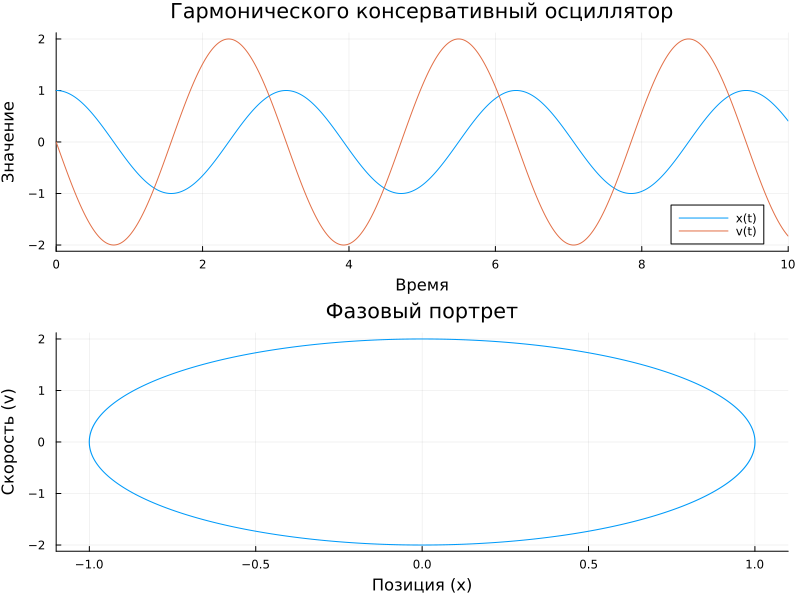

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Harmonic_conservative_oscillator1.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Harmonic_conservative_oscillator1.gif")
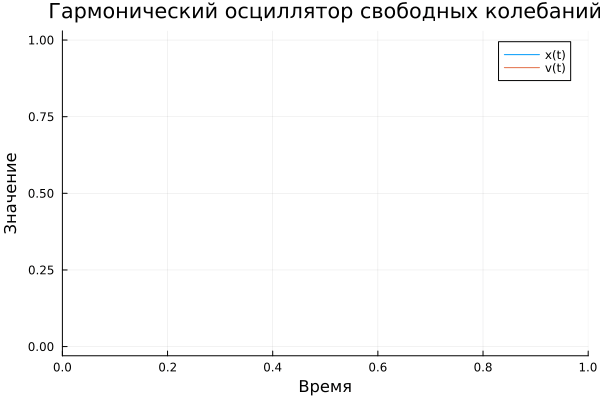

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Harmonic_conservative_oscillator2.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Harmonic_conservative_oscillator2.gif")
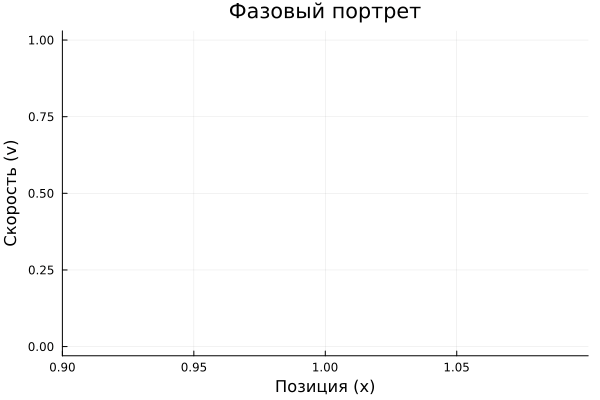

In [9]:
using DifferentialEquations
using Plots

# Определение функции для системы дифференциальных уравнений
function harmonic_oscillator!(du, u, p, t)
    du[1] = u[2]
    du[2] = -p[1]^2 * u[1]
end

# Начальные параметры
w0 = 2.0  # Циклическая частота
t₀ = 0.0  # Начальное время
x0 = 1.0  # Начальное положение
y0 = 0.0  # Начальная скорость

# Задаем начальные условия
u0 = [x0, y0]

# Временной интервал
tspan = (t₀, 10.0)

# Параметры системы
p = [w0]

# Решаем дифференциальное уравнение
prob = ODEProblem(harmonic_oscillator!, u0, tspan, p)
sol = solve(prob)

# Строим графики
plot1 = plot(sol, label=["x(t)" "v(t)"], xlabel="Время", ylabel="Значение", title="Гармонического консервативный осциллятор")

# Строим фазовый портрет
plot2 = plot(sol, vars=(1,2), xlabel="Позиция (x)", ylabel="Скорость (v)", title="Фазовый портрет", label="")

# Анимация
anim1 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"], xlabel="Время", ylabel="Значение", title="Гармонический осциллятор свободных колебаний")
end

anim2 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2), xlabel="Позиция (x)", ylabel="Скорость (v)", title="Фазовый портрет", label="")
end

plot(plot1, plot2, layout=(2,1), legend=:bottomright, size=(800, 600))
display(plot!())

display(gif(anim1, "Harmonic_conservative_oscillator1.gif", fps = 10))
display(gif(anim2, "Harmonic_conservative_oscillator2.gif", fps = 100))

8. Реализовать на языке Julia модель свободных колебаний гармонического осциллятора
$\ddot{x} + 2\gamma\dot{x} + \omega_{0}^{2}x = 0, x(t_{0})= x_{0}, \dot{x}(t_{0}) = y_{0}$
где $\omega_{0}$ — циклическая частота, $\gamma$ — параметр, характеризующий потери энергии.
Начальные параметры подобрать самостоятельно, выбор пояснить. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

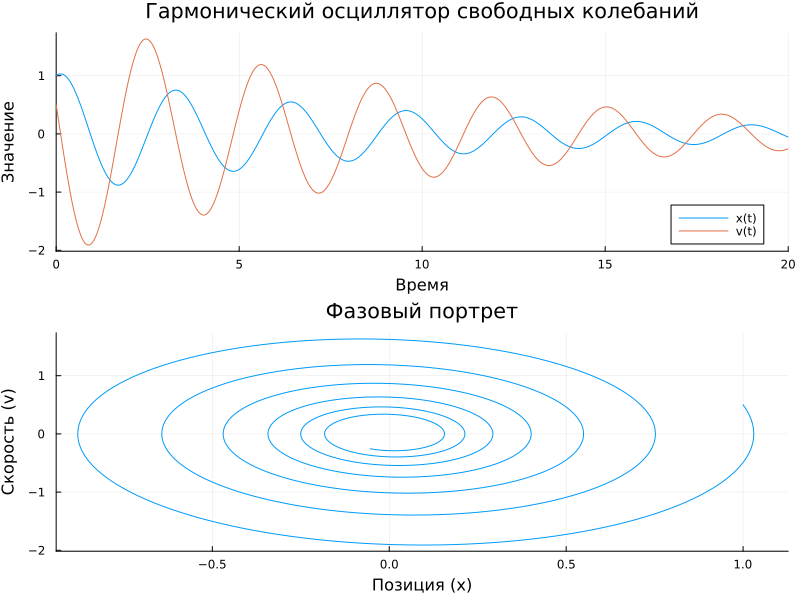

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Free_Oscillator_Harmonic_Oscillator1.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Free_Oscillator_Harmonic_Oscillator1.gif")
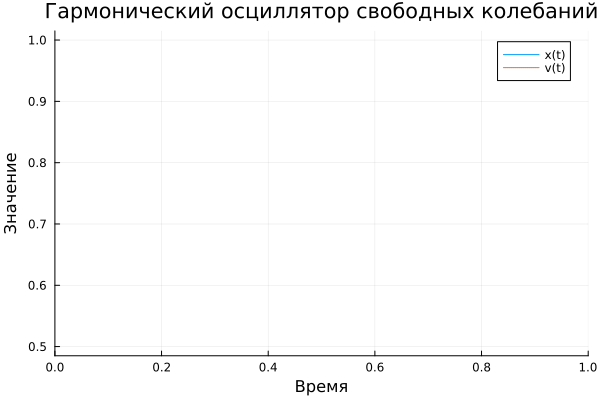

[ Info: Saved animation to Z:\учёба\Компьютерный практикум по статистическому анализу данных\labs\Free_Oscillator_Harmonic_Oscillator2.gif


Plots.AnimatedGif("Z:\\учёба\\Компьютерный практикум по статистическому анализу данных\\labs\\Free_Oscillator_Harmonic_Oscillator2.gif")
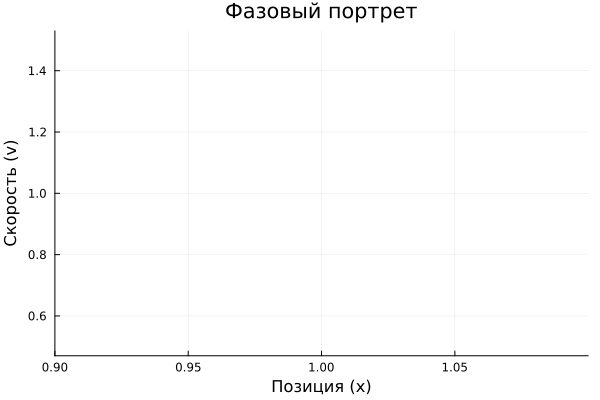

In [10]:
using DifferentialEquations
using Plots

# Определение функции для системы дифференциальных уравнений
function damped_harmonic_oscillator!(du, u, p, t)
    du[1] = u[2]
    du[2] = -2.0 * p[2] * u[2] - p[1]^2 * u[1]
end

# Начальные параметры
w0 = 2.0  # Циклическая частота
γ = 0.1   # Параметр затухания
t₀ = 0.0  # Начальное время
x0 = 1.0  # Начальное положение
y0 = 0.5  # Начальная скорость

# Задаем начальные условия
u0 = [x0, y0]

# Временной интервал
tspan = (t₀, 20.0)

# Параметры системы
p = [w0, γ]

# Решаем дифференциальное уравнение
prob = ODEProblem(damped_harmonic_oscillator!, u0, tspan, p)
sol = solve(prob)

# Строим графики
plot1 = plot(sol, label=["x(t)" "v(t)"], xlabel="Время", ylabel="Значение", title="Гармонический осциллятор свободных колебаний")

# Строим фазовый портрет
plot2 = plot(sol, vars=(1,2), xlabel="Позиция (x)", ylabel="Скорость (v)", title="Фазовый портрет", label="")

# Анимация
anim1 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"], xlabel="Время", ylabel="Значение", title="Гармонический осциллятор свободных колебаний")
end

anim2 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2), xlabel="Позиция (x)", ylabel="Скорость (v)", title="Фазовый портрет", label="")
end

plot(plot1, plot2, layout=(2,1), legend=:bottomright, size=(800, 600))
display(plot!())

display(gif(anim1, "Free_Oscillator_Harmonic_Oscillator1.gif", fps = 10))
display(gif(anim2, "Free_Oscillator_Harmonic_Oscillator2.gif", fps = 100))

Выводы:

Мною были освоены специализированные пакеты для решения задач в непрерывном и дискретном времени.

Список литературы:

Julia 1.5 Documentation. — 2020. — URL: https://docs.julialang.org/en/v1/.\
Klok H.,Nazarathy Y. Statistics with Julia: Fundamentals for Data Science,Machine Learning and Artificial Intelligence. — 2020. — URL: https://statisticswithjulia.org/.\
Ökten G. First Semester in Numerical Analysis with Julia. — Florida State University, 2019. — DOI: 10.33009/jul.\
Антонюк В. А. Язык Julia как инструмент исследователя. — М. : Физический факультет МГУ им. М. В. Ломоносова, 2019.\
Шиндин А. В. Язык программирования математических вычислений Julia. Базовое руководство. — Нижний Новгород : Нижегородский госуниверситет, 2016.\
Задание лабораторной работы №6 - https://esystem.rudn.ru/pluginfile.php/2231412/mod_resource/content/2/006-lab_f_du.pdf